In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\adity\customer_segmentation_project\data\processed\cleaned_data.csv")
df

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,children,TotalAccepted,TotalSpend,TotalPurchases,AgeGroup
0,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,88,...,10,4,7,0,68,0,1,1617,25,60-69
1,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,1,...,1,2,5,0,71,2,0,27,6,70+
2,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,21,...,2,10,4,0,60,0,0,776,21,50-59
3,Graduation,Together,26646.0,2014-02-10,26,11,4,20,10,3,...,0,4,6,0,41,1,0,53,8,40-49
4,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,27,...,3,6,5,0,44,1,0,422,19,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Graduation,Married,61223.0,2013-06-13,46,709,43,182,42,118,...,3,4,5,0,58,1,0,1341,18,50-59
2212,PhD,Together,64014.0,2014-06-10,56,406,0,30,0,0,...,2,5,7,0,79,3,1,444,22,70+
2213,Graduation,Divorced,56981.0,2014-01-25,91,908,48,217,32,12,...,3,13,6,0,44,0,1,1241,19,40-49
2214,Master,Together,69245.0,2014-01-24,8,428,30,214,80,30,...,5,10,3,0,69,1,0,843,23,60-69


In [5]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Age', 'children', 'TotalAccepted',
       'TotalSpend', 'TotalPurchases', 'AgeGroup'],
      dtype='object')

In [7]:
features = ["Age", "Income", 'TotalSpend', 'NumWebPurchases' , 'NumStorePurchases',  'NumWebVisitsMonth', 'Recency']
features

['Age',
 'Income',
 'TotalSpend',
 'NumWebPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Recency']

In [9]:
x=df[features].copy()

In [11]:
x

,Age,Income,TotalSpend,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2211,58,61223.0,1341,9,4,5,46
2212,79,64014.0,444,8,5,7,56
2213,44,56981.0,1241,2,13,6,91
2214,69,69245.0,843,6,10,3,8


In [13]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [17]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]])

In [19]:
from sklearn.cluster import KMeans

In [20]:
wcss = []

In [21]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [24]:
wcss

[10218.620143748785,
 9303.349676497382,
 8159.355714963867,
 7578.217065195128,
 7102.818964506343,
 6820.512393778463,
 6445.565381528359,
 6224.740490354581]

In [25]:
kmeans.inertia_

6224.740490354581

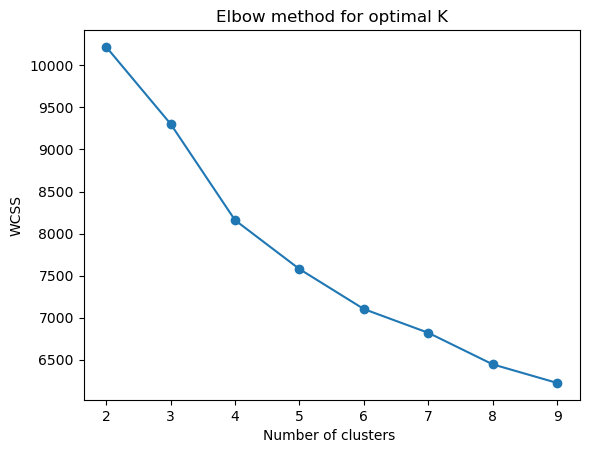

In [27]:
plt.plot(range(2,10),wcss,marker="o")
plt.title("Elbow method for optimal K")
plt.xlabel("Number of clusters ")
plt.ylabel("WCSS")
plt.show()

In [31]:
kmeans = KMeans(n_clusters=6)
df["cluster"]=kmeans.fit_predict(x_scaled)

In [33]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,Complain,Age,children,TotalAccepted,TotalSpend,TotalPurchases,AgeGroup,cluster
0,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,88,...,4,7,0,68,0,1,1617,25,60-69,1
1,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,1,...,2,5,0,71,2,0,27,6,70+,2
2,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,21,...,10,4,0,60,0,0,776,21,50-59,1
3,Graduation,Together,26646.0,2014-02-10,26,11,4,20,10,3,...,4,6,0,41,1,0,53,8,40-49,2
4,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,27,...,6,5,0,44,1,0,422,19,40-49,5


In [35]:
cluster_summary = df.groupby("cluster")[features].mean()

In [37]:
cluster_summary

,Age,Income,TotalSpend,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
cluster,,,,,,,
0,61.423077,54114.355769,590.410256,6.131410,6.346154,6.310897,25.900641
1,58.385455,63040.309091,1066.130909,8.229091,9.000000,6.090909,63.803636
2,50.964427,31972.782609,81.371542,1.867589,2.980237,6.638340,26.363636
3,46.127796,78973.268371,1314.785942,4.539936,8.559105,2.584665,46.578275
4,69.838926,73834.234899,1173.053691,4.372483,8.228188,2.416107,54.060403
5,55.148438,36446.644531,128.150391,2.359375,3.439453,6.357422,76.085938


In [39]:
df["cluster"].value_counts()

cluster
5    512
2    506
3    313
0    312
4    298
1    275
Name: count, dtype: int64

In [41]:
df["Income"].value_counts()

Income
7500.0     12
35860.0     4
37760.0     3
83844.0     3
63841.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: count, Length: 1974, dtype: int64

In [43]:
df["Income"].min()

1730.0

In [45]:
df["Income"].max()

666666.0

In [47]:
from sklearn.metrics import silhouette_score

In [49]:
labels = kmeans.fit_predict(x)

In [51]:
score = silhouette_score(x, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5373479789733879
